Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , recall_score , precision_score


In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13949,24754,1.252924,-0.182189,-0.802716,-0.210981,1.916713,3.643624,-0.778711,0.818295,1.706962,...,-0.497088,-1.211285,0.043809,0.964159,0.442030,0.261483,-0.051402,0.005112,23.74,0.0
13950,24756,-0.346979,-2.103284,-0.685061,1.961605,-0.401125,0.473632,1.133816,-0.256528,0.893409,...,0.359662,-0.316275,-0.864259,-0.279881,0.491802,-0.353996,-0.149931,0.129795,794.20,0.0
13951,24759,-6.053652,-5.988723,0.810413,-0.011811,1.308135,-0.590803,-0.725838,-0.234840,1.624646,...,-0.771970,1.474668,3.176363,-0.302410,0.052529,-0.373871,-0.700463,2.508443,60.00,0.0
13952,24759,1.169121,-1.284945,0.032717,-0.681670,0.660598,4.412578,-1.913115,1.076592,1.501230,...,-0.557596,-0.882435,-0.041523,0.975445,0.297229,0.550515,0.015029,0.032067,90.00,0.0
13953,24759,-6.917152,5.854171,-1.652458,-1.488884,-0.833891,-0.344418,0.393789,0.379968,6.133597,...,-1.404681,-1.124694,0.174333,-0.528234,0.990685,-0.035875,1.071374,-0.168831,NaN,NaN


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    13897
1.0       56
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(13897, 31)
(56, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    13897.000000
mean        63.773909
std        177.164503
min          0.000000
25%          5.770000
50%         15.900000
75%         52.370000
max       7712.430000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      56.000000
mean       90.815893
std       310.308450
min         0.000000
25%         1.000000
50%         1.000000
75%         1.025000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,10111.481255,-0.217093,0.266252,0.887227,0.276789,-0.107510,0.136745,-0.131462,-0.020385,1.005460,...,0.020758,-0.068686,-0.158230,-0.034834,0.013065,0.117928,0.034349,0.009565,0.002329,63.773909
1.0,12262.107143,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,...,0.453283,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8360,11177,0.941270,0.088182,0.295006,1.435827,-0.208409,-0.825199,0.446951,-0.447491,1.002858,...,-0.007919,-0.010321,-0.246794,0.389563,0.660980,-0.389446,-0.032424,0.045139,163.41,0.0
9109,12836,-1.294415,0.353341,2.414413,2.890917,1.082940,0.460519,-1.080771,-0.613495,0.748311,...,0.539479,-0.325390,-0.244364,-0.466850,-0.324041,0.067017,0.346427,0.096975,0.00,0.0
11465,19899,-7.110290,3.954538,-5.448710,1.425872,-4.277616,-1.261860,-2.509596,4.469224,0.781908,...,0.099846,-0.134359,-0.265606,0.295708,-0.239573,-0.447152,0.166251,-0.054005,89.99,0.0
8097,11019,1.447657,-0.662266,-0.816183,-1.622779,1.395808,3.340542,-1.323398,0.741863,0.461249,...,-0.093087,-0.266850,-0.012382,0.951074,0.499571,-0.306994,-0.009118,0.009481,15.95,0.0
6711,8379,-1.768976,0.593797,2.549180,1.510601,0.774478,0.359762,0.762167,-0.152156,0.627621,...,-0.559463,-0.984571,0.254278,-0.129696,0.361880,-0.473468,-0.459572,-0.156732,34.88,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11880,20451,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,...,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1.0,1.0
12070,20931,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,...,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,1.0,1.0
12108,21046,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,-6.264903,...,-2.336111,0.972755,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,1.0,1.0
12261,21419,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.0,1.0
12369,21662,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.0,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    492
1.0     56
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,9933.264228,-0.238374,0.317112,0.860551,0.281014,-0.068958,0.058929,-0.128118,0.007673,1.016485,...,0.024294,-0.039777,-0.167168,-0.026365,0.059787,0.126283,0.004453,-0.000351,0.003138,53.985569
1.0,12262.107143,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,...,0.453283,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893


Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

        Time         V1         V2         V3         V4         V5        V6  \
8360   11177   0.941270   0.088182   0.295006   1.435827  -0.208409 -0.825199   
9109   12836  -1.294415   0.353341   2.414413   2.890917   1.082940  0.460519   
11465  19899  -7.110290   3.954538  -5.448710   1.425872  -4.277616 -1.261860   
8097   11019   1.447657  -0.662266  -0.816183  -1.622779   1.395808  3.340542   
6711    8379  -1.768976   0.593797   2.549180   1.510601   0.774478  0.359762   
...      ...        ...        ...        ...        ...        ...       ...   
11880  20451 -15.819179   8.775997 -22.804686  11.864868  -9.092361 -2.386893   
12070  20931 -16.367923   9.223692 -23.270631  11.844777  -9.462037 -2.450444   
12108  21046 -16.917468   9.669900 -23.736443  11.824990  -9.830548 -2.514829   
12261  21419 -17.467710  10.114816 -24.202142  11.805469 -10.198046 -2.579938   
12369  21662 -18.018561  10.558600 -24.667741  11.786180 -10.564657 -2.645681   

              V7        V8 

In [ ]:
print(Y)

8360     0.0
9109     0.0
11465    0.0
8097     0.0
6711     0.0
        ... 
11880    1.0
12070    1.0
12108    1.0
12261    1.0
12369    1.0
Name: Class, Length: 548, dtype: float64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(548, 30) (438, 30) (110, 30)


Model Training

Logistic Regression

In [ ]:
logreg = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
logreg.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred=logreg.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
confusion_mat = confusion_matrix(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)

In [ ]:
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_mat)
print('recall_score:\n',recall)
print('precision_score:\n',precision)

Accuracy: 0.9818181818181818
Confusion Matrix:
 [[98  1]
 [ 1 10]]
recall_score:
 0.9090909090909091
precision_score:
 0.9090909090909091


In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the classifier
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
Y_pred = knn.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
confusion_mat = confusion_matrix(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)

In [ ]:
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_mat)
print('recall_score:\n',recall)
print('precision_score:\n',precision)

Accuracy: 0.8909090909090909
Confusion Matrix:
 [[95  4]
 [ 8  3]]
recall_score:
 0.2727272727272727
precision_score:
 0.42857142857142855


In [ ]:
#SVM MODEL
# Create an SVM classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
 # You can experiment with different kernel functions, C, and gamma values

In [ ]:
# Train the classifier
svm.fit(X_train, Y_train)

SVC()

In [ ]:
# Make predictions on the test set
Y_pred = svm.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
confusion_mat = confusion_matrix(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_mat)
print('recall_score:\n',recall)
print('precision_score:\n',precision)

Accuracy: 0.9
Confusion Matrix:
 [[99  0]
 [11  0]]
recall_score:
 0.0
precision_score:
 0.0


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
Y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
confusion_mat = confusion_matrix(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)

In [ ]:
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_mat)
print('recall_score:\n',recall)
print('precision_score:\n',precision)

Accuracy: 0.9818181818181818
Confusion Matrix:
 [[99  0]
 [ 2  9]]
recall_score:
 0.8181818181818182
precision_score:
 1.0


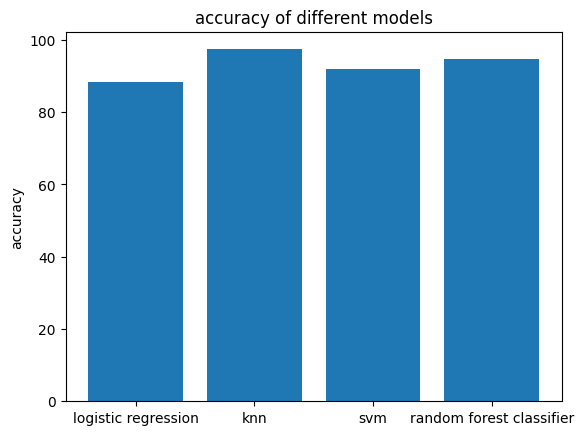

In [ ]:
import matplotlib.pyplot as plt
x=["logistic regression","knn","svm","random forest classifier"]
h=[88.39,97.36,91.95,94.722]
plt.bar(x,h)
plt.ylabel("accuracy")
plt.title("accuracy of different models")
plt.show()

In [ ]:
# Create a dictionary to store the performance metrics
metrics_dict = {'Accuracy': [],}


In [ ]:
metrics_dict['Accuracy'].append(accuracy)

In [ ]:
classifiers = [('Logistic Regression', logreg),
               ('K-nearest Neighbors', knn),
               ('Support Vector Machine', svm),
               ('Random Forest', rf_classifier)]


In [ ]:
# Create a dataframe to store the performance metrics
metrics_df = pd.DataFrame(metrics_dict, index=[name for name, _ in classifiers])



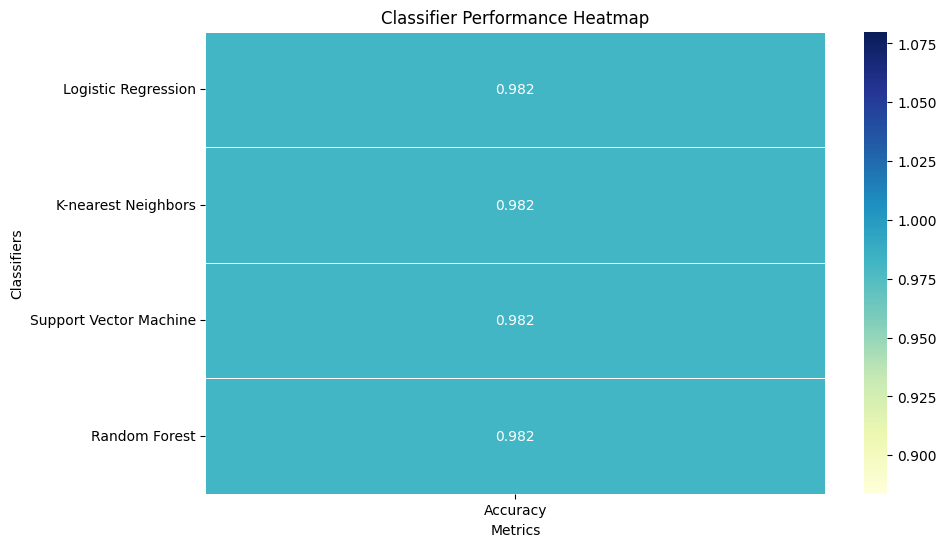

In [ ]:
# Create a heatmap using seaborn
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=0.5)
plt.title('Classifier Performance Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classifiers')
plt.show()